# Exercise 1: Wine Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
#Loading data in a DataFrame:
data_f = load_wine()
#Loading wine features in a matrix:
X = data_f.data
#Loading wine classes in a vector:
y = data_f.target

n_samples, n_features = X.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

df = pd.DataFrame(data_f.data, columns=data_f.feature_names)
X_mean = df.describe(include='all').loc['mean']

#Variance = stardard deviation(std)^2
std_values = df.describe(include='all').loc['std']
X_std = std_values**2

Number of samples: 178
Number of features: 13


# Pre-processing of data

## Without centering and scaling data

In [3]:
#check for missing value
nan_count = df.isnull().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


# PCA algorithm

In [4]:
def pca(X):
    # Step 1: Standardize the data (mean = 0, variance = 1)
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Calculate the principal components
    principal_components = X_meaned.dot(eigenvectors)
    
    return principal_components, eigenvectors, eigenvalues

In [5]:
principal_components, rotation_matrix, eigenvalues = pca(X)
print("Principal Components:\n", principal_components)
print("\nRotation Matrix (Eigenvectors):\n", rotation_matrix)
print("\nEigenvalues:\n", eigenvalues)

Principal Components:
 [[-3.18562979e+02 -2.14921307e+01 -3.13073470e+00 ...  8.87340044e-02
   3.85475626e-02  8.02644337e-02]
 [-3.03097420e+02  5.36471768e+00 -6.82283550e+00 ...  3.97781862e-02
   5.71915771e-02  1.35927465e-02]
 [-4.38061133e+02  6.53730945e+00  1.11322298e+00 ...  2.37770027e-01
   4.87978751e-02 -3.54081623e-02]
 ...
 [-8.84580737e+01 -1.87762846e+01  2.23757651e+00 ... -2.23049341e-01
  -9.60485020e-02  3.61748954e-02]
 [-9.34562419e+01 -1.86708191e+01  1.78839152e+00 ... -3.04078323e-02
   5.20893107e-02  1.32759078e-01]
 [ 1.86943190e+02  2.13330803e-01  5.63050984e+00 ...  1.60725068e-01
  -3.19201764e-02  2.69369989e-02]]

Rotation Matrix (Eigenvectors):
 [[-1.65926472e-03 -1.20340617e-03  1.68738094e-02  1.41446778e-01
  -2.03369773e-02  1.94120104e-01 -9.23280337e-01  2.84820658e-01
   8.66006124e-02 -2.24499994e-03 -1.49715080e-02  1.56514071e-02
   8.02924535e-03]
 [ 6.81015556e-04 -2.15498184e-03  1.22003373e-01  1.60389543e-01
   6.12883454e-01  7.424

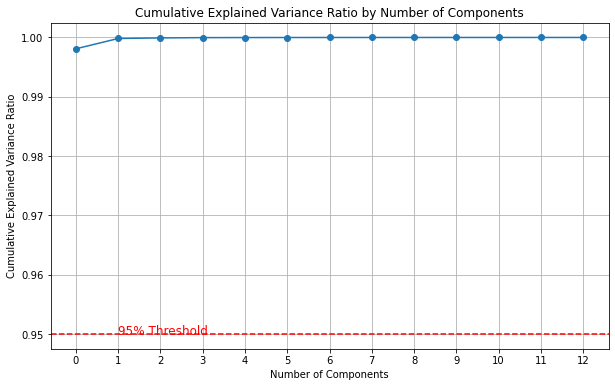

In [6]:
# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(cumulative_variance)), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.xticks(range(0, len(cumulative_variance)))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(1, 0.95, '95% Threshold', color='red', fontsize=12)
plt.show()

The behavior observed can be explained as follows:

Dimensionality Reduction: In many datasets, including the Wine dataset, a significant portion of the variance is captured by a small number of principal components. This is often due to the underlying structure of the data, where certain features are correlated and can be represented by fewer dimensions.

Eigenvalues Interpretation: The eigenvalues obtained from PCA indicate the amount of variance captured by each principal component. Components corresponding to higher eigenvalues are more informative, while those with lower eigenvalues contribute less to explaining the variability in the data.

Optimal Number of Components: In practice, a common heuristic is to choose enough components to explain a desired threshold of variance (e.g., 95%). This allows us to reduce dimensionality while retaining most of the information present in the dataset.

## With centering and scaling data

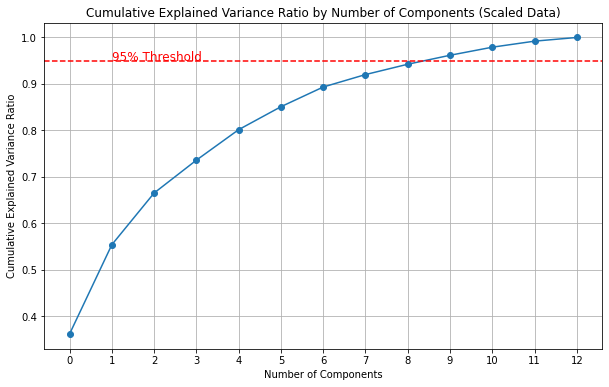

In [7]:
#standardize dataset
def center_and_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Center and scale the data
X_scaled = center_and_scale(X)

principal_components, rotation_matrix, eigenvalues = pca(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(cumulative_variance)), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance Ratio by Number of Components (Scaled Data)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.xticks(range(0, len(cumulative_variance)))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(1, 0.95, '95% Threshold', color='red', fontsize=12)
plt.show()

Observations Improved Variance Capture: The cumulative variance ratio may now reflect a more balanced contribution from each principal component due to the equal scaling of features.  
Smoother Increase: The curve might show a smoother increase, indicating that PCA can effectively capture variance from all components.  
Threshold Achievement: Fewer components may be required to reach the 95% variance threshold compared to the raw data.
Explanation
By centering and scaling the data:

Standardization: Each feature contributes equally to the analysis, mitigating the risk that features with larger ranges dominate the PCA results.  
Feature Interpretation: This allows for a clearer interpretation of the principal components since they are now on the same scale.  
Dimensionality Reduction: It facilitates more effective dimensionality reduction while retaining relevant information from all features.  
This approach is essential in PCA applications, especially when dealing with datasets that have features measured in different units or scales.

# Using Scikit learn

## Without centering ans scaling data

In [8]:
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA(n_components=13)
X_pca_components = pca.fit(X)

#Rotation matrix
rotation_matrix = pca.components_.T

#Variance ratio
print(pca.explained_variance_ratio_)

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


Text(0, 0.5, 'cumulative explained variance')

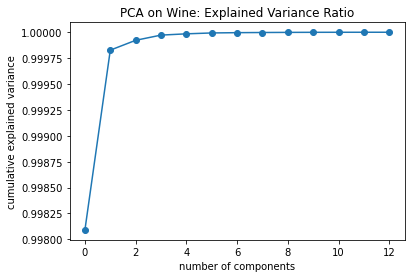

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('PCA on Wine: Explained Variance Ratio')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Centering and scaling data scikit learn

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardize features
scaler = StandardScaler()
X_cs = scaler.fit_transform(X)

#Apply PCA
pca = PCA()
X_pca_components = pca.fit_transform(X_cs)

#Rotation matrix
rotation_matrix = pca.components_.T

#Variance_ratio
variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", variance_ratio)

Explained Variance Ratio:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


Text(0, 0.5, 'cumulative explained variance')

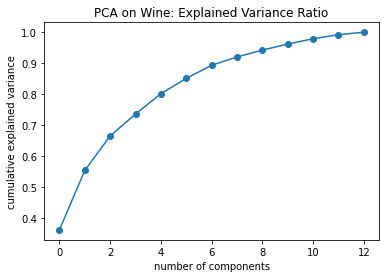

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('PCA on Wine: Explained Variance Ratio')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

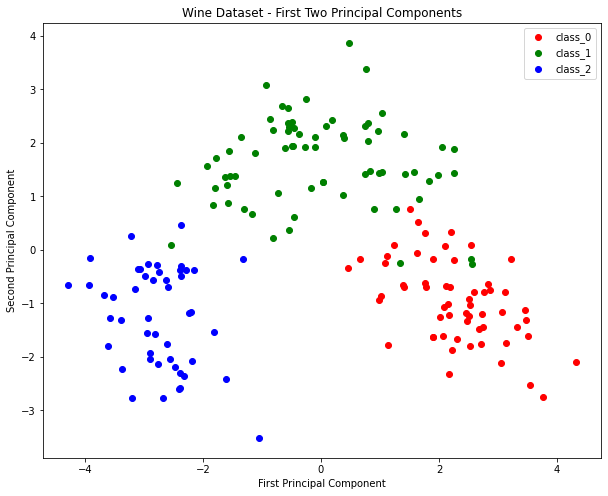

In [15]:
# Plotting the first two principal components
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for i, c in zip(range(3), colors):
    plt.scatter(X_pca_components[y == i, 0], X_pca_components[y == i, 1], c=c, label=data_f.target_names[i])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('Wine Dataset - First Two Principal Components')
plt.show()

Observations Variance Explained: The printed explained variance ratio shows how much variance is captured by each of the principal components. This should closely match the results you obtained with your custom PCA implementation.  
Data Distribution: The scatter plot of the first two principal components shows how the different classes of wine are distributed in the reduced feature space.  
Class Separation: You may observe that certain classes are more clustered together while others are more spread out, indicating how well PCA has captured the variance relevant to class distinction.  

Explanation  
Effective Dimensionality Reduction: PCA helps in reducing dimensionality while retaining important information, allowing for easier visualization and analysis.  
Class Separation: If classes are well separated in the PCA plot, this indicates that PCA effectively captures the variance related to those class distinctions, suggesting potential for better classification in machine learning tasks.  

# Exercise 2: Written digits dataset

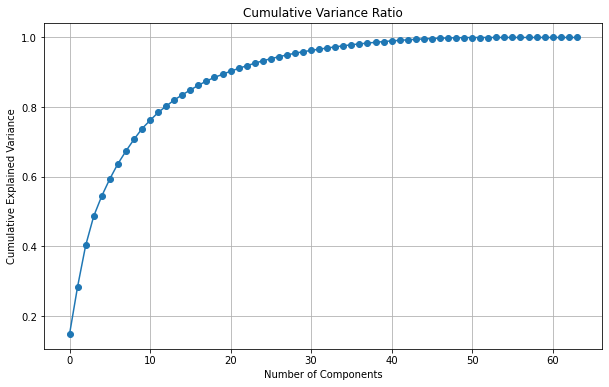

In [17]:
from sklearn.datasets import load_digits

#Load data in a DataFrame:
data_f = load_digits()
#Loading wine features in a matrix:
X = data_f.data
#Loading wine classes in a vector:
y = data_f.target

#Apply PCA
pca = PCA()
pca.fit(X)

#Calculate cumulative variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Plot cumulative variance ratio
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

#To compress images by a factor of 4
n_components = 16 # Since 64 / 4 = 16
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

# X_reduced now contains the compressed representation of the images

To determine the quantity of information retained after compressing the images by a factor of 4 using PCA, you can look at the cumulative variance explained by the principal components you selected.

In the case of the digits dataset, the original image vectors have a dimensionality of 64 (since each image is 8x8 pixels). By compressing them to 16 dimensions (which is 64/4), we can compute the variance explained by the first 16 principal components.

Here’s how you can calculate that:

Fit PCA with 16 components. Check the explained variance ratio.

In [18]:
# Fit PCA with 16 components
n_components = 16 
pca = PCA(n_components=n_components)
pca.fit(X)

#Variance explained by the seleted components
variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by {n_components} components: {variance_explained:.4f}")

Variance explained by 16 components: 0.8494


Interpretation:  
The output will give you the total variance explained by the 16 components. This value, ranging from 0 to 1, indicates the proportion of the original variance retained in the compressed data.  
For instance, if the output is around 0.75, it means you retain approximately 75% of the information (in terms of variance) from the original dataset.

In [19]:
#Fit PCA with 16 components
n_components = 16 # Since 64 / 4 = 16
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

def inverse_pca(X_reduced, pca):
    """
    Perform inverse PCA transformation.
    
    Parameters:
    - X_reduced: The reduced data (after PCA).
    - pca: The fitted PCA object containing the rotation matrix.
    
    Returns:
    - X_reconstructed: The reconstructed original data.
    """
    # Use the PCA inverse_transform method
    X_reconstructed = pca.inverse_transform(X_reduced)
    return X_reconstructed
# Reconstruct the original data
X_reconstructed = inverse_pca(X_reduced, pca)

#Check if the reconstuction works
print("Original Data Shape:", X.shape)
print("Reduced Data Shape:", X_reduced.shape)
print("Reconstructed Data Shape:", X_reconstructed.shape)

Original Data Shape: (1797, 64)
Reduced Data Shape: (1797, 16)
Reconstructed Data Shape: (1797, 64)


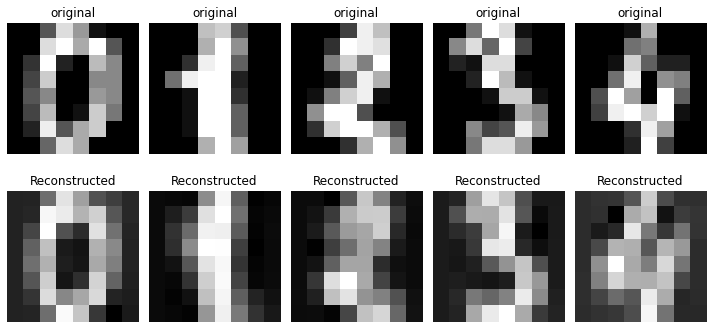

In [20]:
def plot_images(original, reconstructed, n=5):
    plt.figure(figsize=(10,5))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(original[i].reshape(8,8), cmap='gray')
        plt.title('original')
        plt.axis('off')
        
        #Reconstructed images
        plt.subplot(2, n, i+1+n)
        plt.imshow(reconstructed[i].reshape(8,8), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Plot original and reconstructed images
plot_images(X, X_reconstructed, n=5)

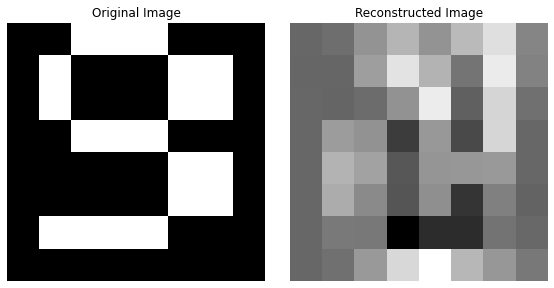

In [21]:
# Create a custom 8x8 image of the digit '3'
custom_image = np.array([
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# Reshape the custom image to match the expected input shape for PCA
custom_image_reshaped = custom_image.flatten().reshape(1, -1)  # Shape (1, 64)

# Fit PCA with 16 components (same as before)
n_components = 16
pca = PCA(n_components=n_components)
# We can fit PCA on a dummy dataset for the sake of demonstration
# Load the digits dataset for fitting PCA
data_f = load_digits()
X = data_f.data
pca.fit(X)

# Project the custom image onto the principal components
custom_image_reduced = pca.transform(custom_image_reshaped)

# Inverse PCA transformation to reconstruct the image
def inverse_pca(X_reduced, pca):
    X_reconstructed = pca.inverse_transform(X_reduced)
    return X_reconstructed

# Reconstruct the custom image
custom_image_reconstructed = inverse_pca(custom_image_reduced, pca)

# Plot original and reconstructed images
def plot_custom_image(original, reconstructed):
    plt.figure(figsize=(8, 4))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original.reshape(8, 8), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.reshape(8, 8), cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot the original and reconstructed images
plot_custom_image(custom_image_reshaped, custom_image_reconstructed)

In [22]:
# Create a custom 8x8 image of the digit '3'
custom_image = np.array([
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# Reshape the custom image to match the expected input shape for PCA
custom_image_reshaped = custom_image.flatten().reshape(1, -1)

# Fit PCA with 16 components
n_components = 16
pca = PCA(n_components=n_components)
pca.fit(X)

# Compute distances in original space
norm2_distances_original = np.linalg.norm(X - custom_image_reshaped, axis=1)

# Project both custom image and dataset images onto PCA
custom_image_reduced = pca.transform(custom_image_reshaped)
X_reduced = pca.transform(X)

# Compute distances in compressed space
norm2_distances_compressed = np.linalg.norm(X_reduced - custom_image_reduced, axis=1)

# Print out the distances
print("Norm-2 distances (Original Space):")
print(norm2_distances_original)

print("\nNorm-2 distances (Compressed Space):")
print(norm2_distances_compressed)

# Optionally, find the closest match in both spaces
closest_original_index = np.argmin(norm2_distances_original)
closest_compressed_index = np.argmin(norm2_distances_compressed)

print(f"\nClosest match in original space: Index {closest_original_index}, Distance: {norm2_distances_original[closest_original_index]:.4f}")
print(f"Closest match in compressed space: Index {closest_compressed_index}, Distance: {norm2_distances_compressed[closest_compressed_index]:.4f}")

Norm-2 distances (Original Space):
[52.85830115 63.01587102 64.56004957 ... 69.29646456 63.51377803
 68.05879811]

Norm-2 distances (Compressed Space):
[48.86979727 59.10283038 60.36100228 ... 66.7890749  59.78641044
 64.56472372]

Closest match in original space: Index 1626, Distance: 45.5741
Closest match in compressed space: Index 776, Distance: 40.7480


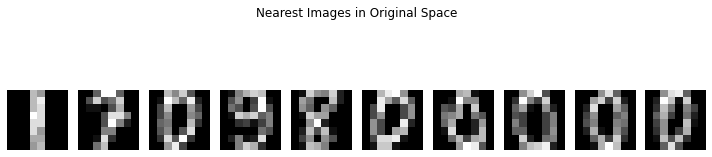

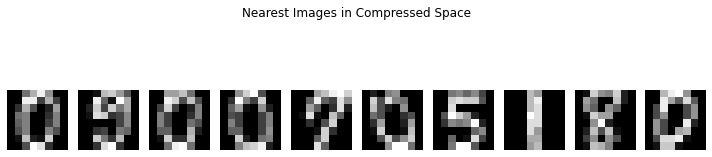

In [23]:
# Function to find N nearest images
def find_nearest_images(distances, N=100):
    nearest_indices = np.argsort(distances)[:N]
    return nearest_indices

# Find the 100 nearest images in original and compressed spaces
nearest_original_indices = find_nearest_images(norm2_distances_original, N=100)
nearest_compressed_indices = find_nearest_images(norm2_distances_compressed, N=100)

# Display the nearest images
def plot_nearest_images(original, indices, title, n=10):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(original[indices[i]].reshape(8, 8), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plotting the nearest images
plot_nearest_images(X, nearest_original_indices, "Nearest Images in Original Space", n=10)
plot_nearest_images(X, nearest_compressed_indices, "Nearest Images in Compressed Space", n=10)

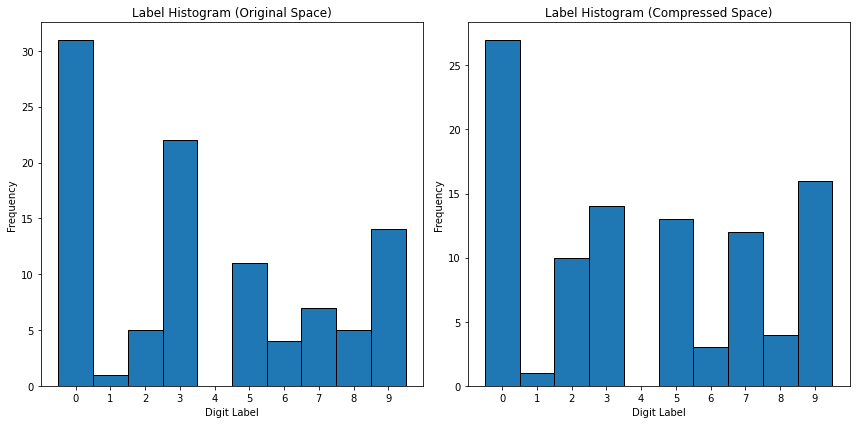

In [24]:
# Plot histograms of labels for the nearest neighbors
def plot_label_histogram(labels, indices, title):
    nearest_labels = labels[indices]
    plt.hist(nearest_labels, bins=np.arange(11) - 0.5, edgecolor='black')
    plt.xticks(range(10))
    plt.title(title)
    plt.xlabel('Digit Label')
    plt.ylabel('Frequency')

# Plot histograms for both situations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_label_histogram(y, nearest_original_indices, 'Label Histogram (Original Space)')

plt.subplot(1, 2, 2)
plot_label_histogram(y, nearest_compressed_indices, 'Label Histogram (Compressed Space)')

plt.tight_layout()
plt.show()